# Regularized Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from plot_class import *
from cross_entropy_loss_reg import *
from plot_decision_boundary import *

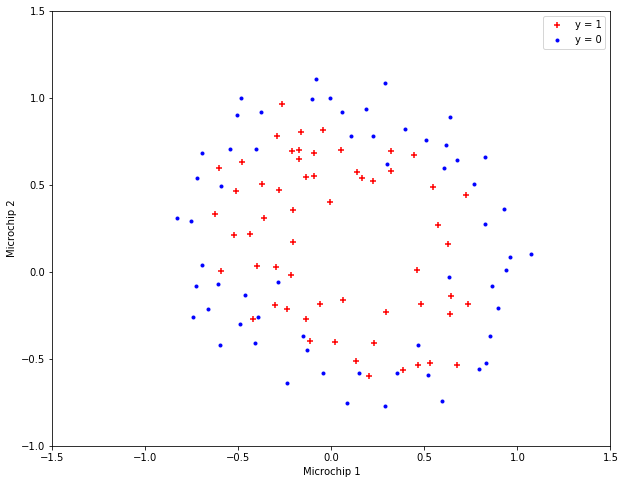

In [2]:
ex2data2 = np.loadtxt('ex2data2.txt', delimiter=',')

x = ex2data2[:, 0:2]
y = ex2data2[:, 2]

plt.figure(figsize=(10, 8))
plot_class(x, y)
plt.xlabel("Microchip 1")
plt.ylabel("Microchip 2")
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1.5)
plt.legend(["y = 1", "y = 0"])
plt.show()

In [3]:
x_poly = map_feature(x[:, 0], x[:, 1], degree=6)
m, n = x_poly.shape
X = x_poly
theta = np.zeros((n, 1))
reg_lambda = 0

In [4]:
cross_entropy_loss_reg(theta, X, y, reg_lambda)

0.6931471805599454

In [5]:
cross_entropy_gradient_reg(theta, X, y, reg_lambda)

array([1.        , 2.216995  , 0.009177  , 5.94066747, 1.35715703,
       4.44445199, 2.16600649, 0.8642242 , 0.96670847, 2.77022569,
       4.64313757, 0.26423021, 1.51748594, 0.36532059, 4.63773242,
       2.35654811, 0.51092021, 0.3995998 , 0.68891005, 0.5282023 ,
       3.65894222, 3.66168682, 0.12949348, 0.74525354, 0.04820335,
       0.85727509, 0.16242249, 4.57764909])

In [6]:
options = {'eps':0.5e-5, 'maxiter':1000}
out = list()
for i, Lambda in enumerate([0, 1, 100]):
    out.append(opt.minimize(fun=cross_entropy_loss_reg, x0=theta, method='BFGS', args=(X, y, Lambda), options=options))
    acc = np.mean([sigmoid(np.dot(X, out[i].x)) >= 0.5] == y.ravel())
    print("Accuracy with lambda=" + str(Lambda) + ": " + str(acc))

Accuracy with lambda=0: 0.9152542372881356
Accuracy with lambda=1: 0.8135593220338984
Accuracy with lambda=100: 0.6016949152542372


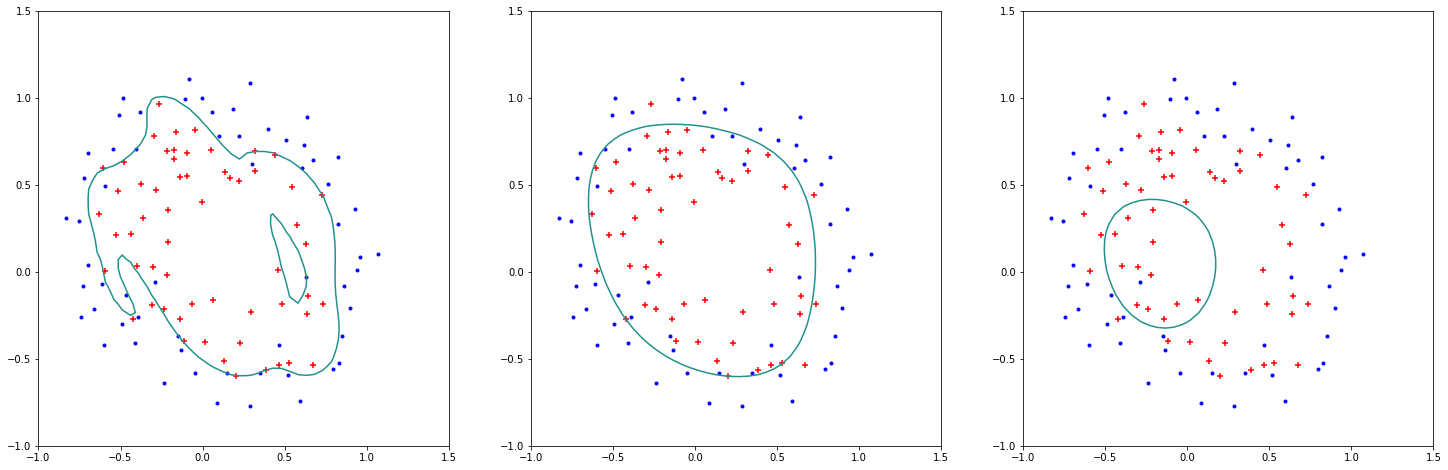

In [7]:
plt.figure(figsize=(25, 8))
plt.subplot(131)
plot_class(x, y)
plot_decision_boundary(out[0].x, X, y)
plt.subplot(132)
plot_class(x, y)
plot_decision_boundary(out[1].x, X, y)
plt.subplot(133)
plot_class(x, y)
plot_decision_boundary(out[2].x, X, y)